<a href="https://colab.research.google.com/github/Pamgerber/Processamento_Imagens-M2/blob/main/Pr%C3%A1tica2_Filtragem_Espacial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Universidade do Vale do Itajaí

Escola Politécnica

Processamento Digital de Sinais: Imagens

Professor Felipe Viel

M2- Pamela Bandeira Gerber e Ismar Pedrini

**Exercício Avalitivo de Filtragem Espacial**

Tutoriais da OpenCV


*   https://docs.opencv.org/master/d9/df8/tutorial_root.html
*   https://www.geeksforgeeks.org/opencv-python-tutorial/

**Conversão de imagem RGB em imagem Grayscale**

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Abrir a imagem
img = cv2.imread('/content/drive/MyDrive/Filtragem_Espacial/Cópia de circulos.png', 1)

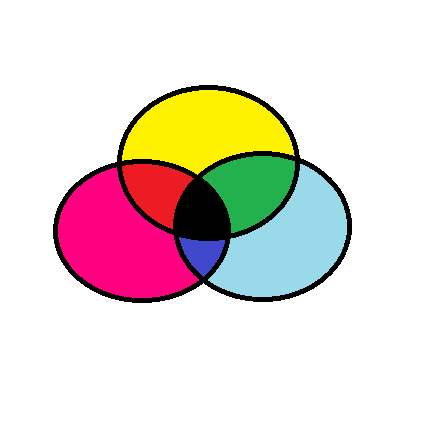

In [ ]:
# Mostrando a imagem colorida
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

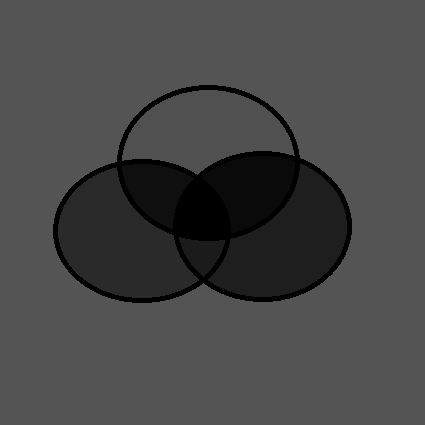

In [ ]:
#aplicando conversão básica
# Numpy
#img_grayscale_basic = (img[:, :, 0] + img[:, :, 1] + img[:, :, 2]) / 3

# Cv2
B, G, R = cv2.split(img)
img_grayscale_basic = (B + G + R) / 3

img_grayscale_basic = np.array(img_grayscale_basic, dtype=np.uint8)

cv2_imshow(img_grayscale_basic)
cv2.waitKey(0)
cv2.destroyAllWindows()

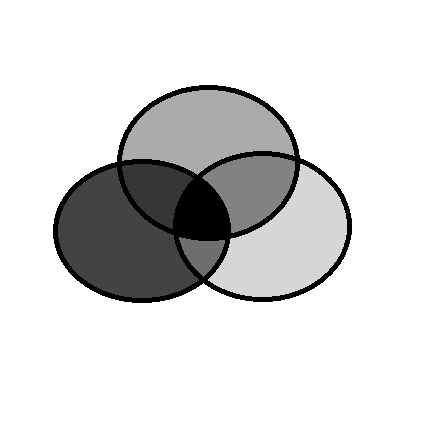

In [ ]:
#aplicando conversão ponderada
#img_grayscale_pondered = 0.299 * img[:, :, 0] + 0.587 * img[:, :, 1] + 0.114 * img[:, :, 2]

# Cv2
B, G, R = cv2.split(img)
img_grayscale_pondered = 0.299 * B+ 0.587 * G+ 0.114 * R

img_grayscale_pondered = np.array(img_grayscale_pondered, dtype=np.uint8)

cv2_imshow(img_grayscale_pondered)
cv2.waitKey(0)
cv2.destroyAllWindows()

**Filtro Espacial**

Original


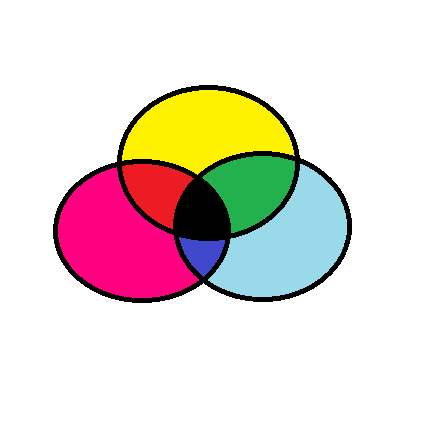

Filtrada


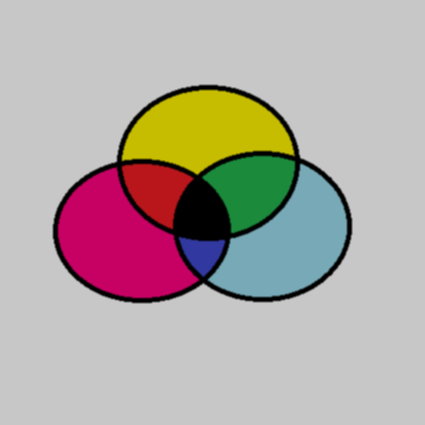

In [ ]:
# Abrir a imagem
img = cv2.imread('/content/drive/MyDrive/Filtragem_Espacial/Cópia de circulos.png')

def gauss_create(sigma=1, size_x=3, size_y=3):
    x, y = np.meshgrid(np.linspace(-1, 1, size_x), np.linspace(-1, 1, size_y))
    calc = 1 / (2 * np.pi * sigma ** 2)
    exp = np.exp(-((x ** 2 + y ** 2) / (2 * sigma ** 2)))
    kernel = exp * calc
    return kernel

kernel = gauss_create(sigma=1, size_x=3, size_y=3)

# Filtro Gaussiano usando convolução
img_filtrada = cv2.filter2D(img, -1, kernel)

print("Original")
cv2_imshow(img)
cv2.waitKey(0)
print("Filtrada")
cv2_imshow(img_filtrada)
cv2.waitKey(0)
cv2.destroyAllWindows()

**Suavização**

In [ ]:
import cv2
import numpy as np
from skimage.util import random_noise
import matplotlib.pyplot as plt

img = cv2.imread('/content/drive/MyDrive/Filtragem_Espacial/Cópia de circulos.png')

In [ ]:
# Adicionado o ruído
img_noisy = random_noise(img, mode='gaussian', var=0.01)
img_noisy = np.uint8(255 * img_noisy)

# Máscaras
mascara_media_3x3 = np.ones((3, 3)) / 9
mascara_gaussiana_3x3 = cv2.getGaussianKernel(3, 1)
mascara_gaussiana_3x3 = np.outer(mascara_gaussiana_3x3, mascara_gaussiana_3x3)
mascara_mediana_3x3 = np.ones((3, 3))

mascara_media_5x5 = np.ones((5, 5)) / 25
mascara_gaussiana_5x5 = cv2.getGaussianKernel(5, 1)
mascara_gaussiana_5x5 = np.outer(mascara_gaussiana_5x5, mascara_gaussiana_5x5)
mascara_mediana_5x5 = np.ones((5, 5))

mascara_media_7x7 = np.ones((7, 7)) / 49
mascara_gaussiana_7x7 = cv2.getGaussianKernel(7, 1)
mascara_gaussiana_7x7 = np.outer(mascara_gaussiana_7x7, mascara_gaussiana_7x7)
mascara_mediana_7x7 = np.ones((7, 7))

# Convolução
img_suavizada_media_3x3 = cv2.filter2D(img_noisy, -1, mascara_media_3x3)
img_suavizada_gaussiana_3x3 = cv2.filter2D(img_noisy, -1, mascara_gaussiana_3x3)
img_suavizada_mediana_3x3 = cv2.medianBlur(img_noisy, 3)

img_suavizada_media_5x5 = cv2.filter2D(img_noisy, -1, mascara_media_5x5)
img_suavizada_gaussiana_5x5 = cv2.filter2D(img_noisy, -1, mascara_gaussiana_5x5)
img_suavizada_mediana_5x5 = cv2.medianBlur(img_noisy, 5)

img_suavizada_media_7x7 = cv2.filter2D(img_noisy, -1, mascara_media_7x7)
img_suavizada_gaussiana_7x7 = cv2.filter2D(img_noisy, -1, mascara_gaussiana_7x7)
img_suavizada_mediana_7x7 = cv2.medianBlur(img_noisy, 7)

Suavização Média 3x3


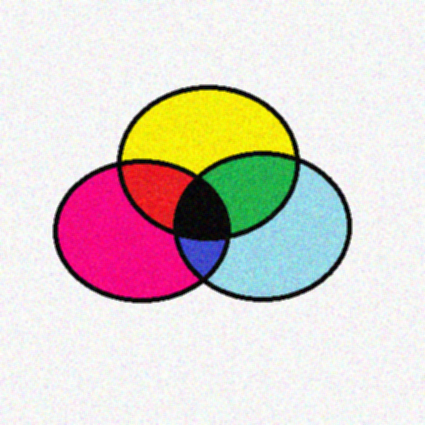

Suavização Gaussiana 3x3


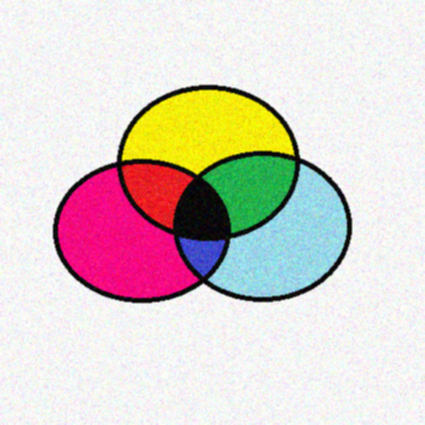

Suavização Mediana 3x3


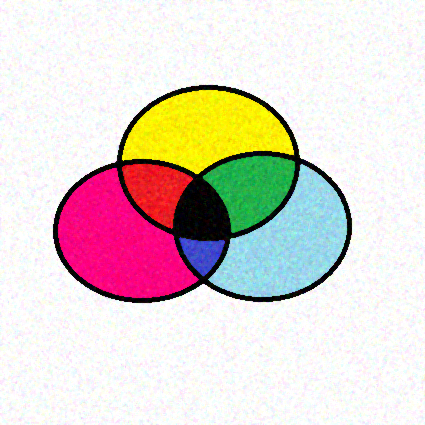

In [ ]:
print("Suavização Média 3x3")
cv2_imshow(img_suavizada_media_3x3)
cv2.waitKey(0)
print("Suavização Gaussiana 3x3")
cv2_imshow(img_suavizada_gaussiana_3x3)
cv2.waitKey(0)
print("Suavização Mediana 3x3")
cv2_imshow(img_suavizada_mediana_3x3)
cv2.waitKey(0)
cv2.destroyAllWindows()

Suavização Média 5x5


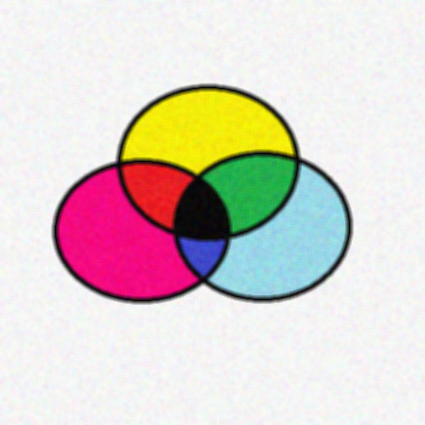

Suavização Gaussiana 5x5


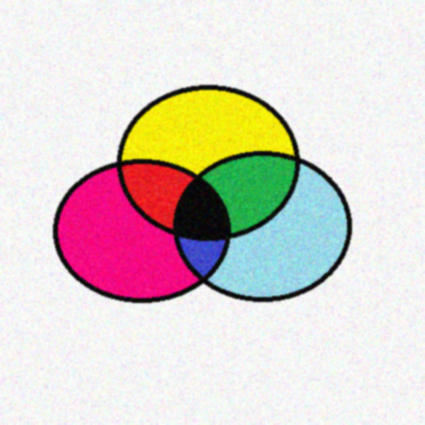

Suavização Mediana 5x5


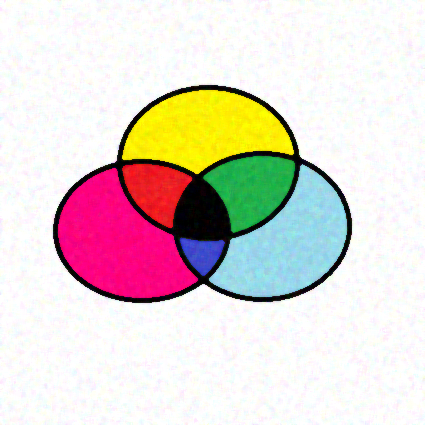

In [ ]:
print("Suavização Média 5x5")
cv2_imshow(img_suavizada_media_5x5)
cv2.waitKey(0)
print("Suavização Gaussiana 5x5")
cv2_imshow(img_suavizada_gaussiana_5x5)
cv2.waitKey(0)
print("Suavização Mediana 5x5")
cv2_imshow(img_suavizada_mediana_5x5)
cv2.waitKey(0)
cv2.destroyAllWindows()

Suavização Média 7x7


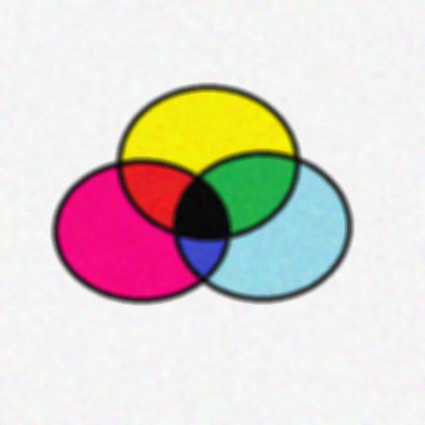

Suavização Gaussiana 7x7


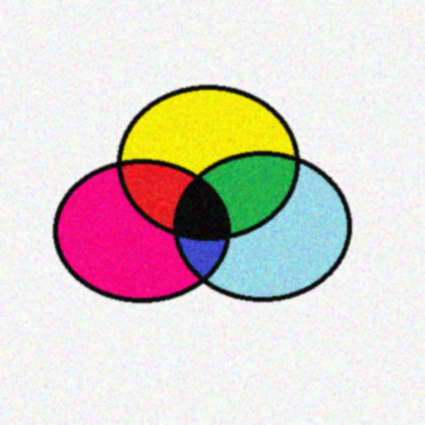

Suavização Mediana 7x7


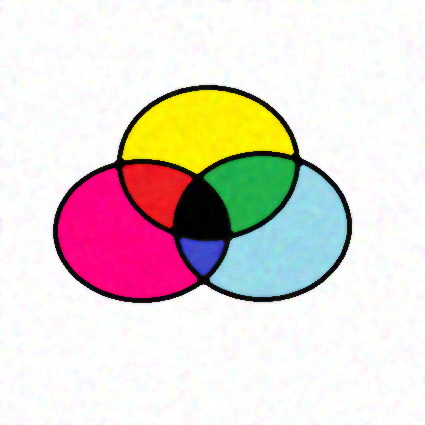

In [ ]:
print("Suavização Média 7x7")
cv2_imshow(img_suavizada_media_7x7)
cv2.waitKey(0)
print("Suavização Gaussiana 7x7")
cv2_imshow(img_suavizada_gaussiana_7x7)
cv2.waitKey(0)
print("Suavização Mediana 7x7")
cv2_imshow(img_suavizada_mediana_7x7)
cv2.waitKey(0)
cv2.destroyAllWindows()

Média

Média 3x3: Existência de pouco ruído, preservando um pouco da imagem original, as bordas são um pouco suavizadas, mas continuam visíveis.

Média 5x5: Quase não se percebe os ruídos, causa esmaecimento mais nas bordas da imagem. Ela fica mais suave, porém perde os detalhes finos.

Média 7x7: Reduz bastante o ruído não tendo muita percepção destes, suavizando as bordas. E com isso, se perde muitos detalhes e nitidez da imagem.

Gaussiana

Gaussiana 3x3: Existência de pouco ruído, preserva mais detalhes em comparação com a suavização média e também suas bordas tem um pouco mais de realce.

Gaussiana 5x5: Ainda continua com pouco ruído e as bordas um pouco menos esmaecidos em comparação com a suavização média, porém menos esmaecido em comparação ao kernel 3x3, e a imagem ser mais nítida que a suavização média.

Gaussiana 7x7: Produz o mesmo ruído entre os outros kernels e é um pouco mais suave as bordas. A imagem mantém mais detalhes em comparação com a suavização média 7x7.

Mediana

Mediana 3x3: Existência de mais ruído que os outros filtros, preserva mais as bordas não contendo esmaecimento pelo realce, além de preservar os detalhes finos da imagem original.

Mediana 5x5: Reduz bastante o ruído não tendo quase nada de percepção destes, mantendo as bordas nítidas, além de preservar a nitidez da imagem original.

Mediana 7x7: Reduziu bem mais o ruído e mantém nítidas as bordas e detalhes, fazendo até alterações nas bordas tendo um aumento nos detalhes quando unem as formas de círculo, meio que fica expandido.

**Sharpening**


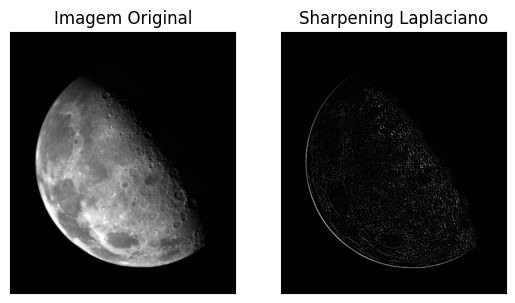

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('/content/drive/MyDrive/Filtragem_Espacial/Fig0338(a)(blurry_moon).tif', 0)

# Filtro de sharpening Laplaciano
laplacian_kernel = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
sharpened_img_laplacian = cv2.filter2D(img, -1, laplacian_kernel)

plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Imagem Original'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(sharpened_img_laplacian, cmap='gray')
plt.title('Sharpening Laplaciano'), plt.xticks([]), plt.yticks([])
plt.show()

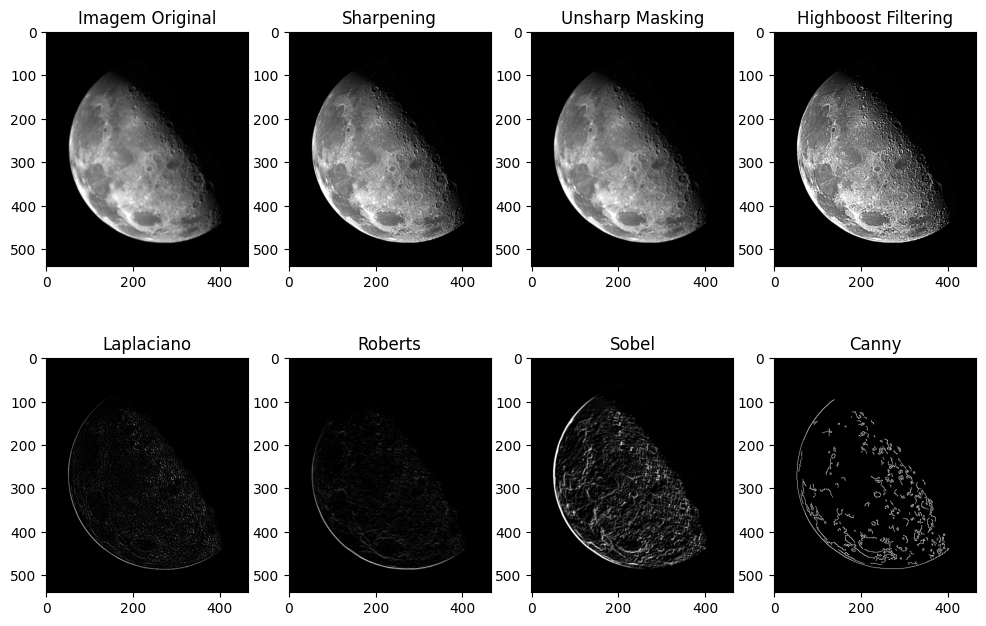

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Filtragem_Espacial/Fig0338(a)(blurry_moon).tif', 0)

# Filtro de Sharpening (Figura 3.38)
sharpening_kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
sharpened_img = cv2.filter2D(img, -1, sharpening_kernel)

# Unsharp Masking
blurred = cv2.GaussianBlur(img, (0, 0), 2)
unsharp_mascara = cv2.addWeighted(img, 1.5, blurred, -0.5, 0)

# Highboost Filtering
k = 2.0
highboost_kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
highboost_img = cv2.filter2D(img, -1, highboost_kernel)

# Detector de Borda Laplaciano
laplacian_kernel = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
borda_laplaciano = cv2.filter2D(img, -1, laplacian_kernel)

# Detector de Borda Roberts
roberts_kernel_x = np.array([[1, 0], [0, -1]])
roberts_kernel_y = np.array([[0, 1], [-1, 0]])
borda_roberts_x = cv2.filter2D(img, -1, roberts_kernel_x)
borda_roberts_y = cv2.filter2D(img, -1, roberts_kernel_y)
borda_roberts = cv2.add(np.abs(borda_roberts_x), np.abs(borda_roberts_y))

# Detector de Borda Sobel
sobel_kernel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_kernel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
borda_sobel_x = cv2.filter2D(img, -1, sobel_kernel_x)
borda_sobel_y = cv2.filter2D(img, -1, sobel_kernel_y)
borda_sobel = cv2.add(np.abs(borda_sobel_x), np.abs(borda_sobel_y))

# Função Canny
borda_canny = cv2.Canny(img, 100, 200)

plt.figure(figsize=(12, 12))
plt.subplot(3, 4, 1), plt.imshow(img, cmap='gray'), plt.title('Imagem Original')
plt.subplot(3, 4, 2), plt.imshow(sharpened_img, cmap='gray'), plt.title('Sharpening')
plt.subplot(3, 4, 3), plt.imshow(unsharp_mascara, cmap='gray'), plt.title('Unsharp Masking')
plt.subplot(3, 4, 4), plt.imshow(highboost_img, cmap='gray'), plt.title('Highboost Filtering')
plt.subplot(3, 4, 5), plt.imshow(borda_laplaciano, cmap='gray'), plt.title('Laplaciano')
plt.subplot(3, 4, 6), plt.imshow(borda_roberts, cmap='gray'), plt.title('Roberts')
plt.subplot(3, 4, 7), plt.imshow(borda_sobel, cmap='gray'), plt.title('Sobel')
plt.subplot(3, 4, 8), plt.imshow(borda_canny, cmap='gray'), plt.title('Canny')
plt.show()

Relate as observações visíveis nas imagens de saída com os filtros usados, descrevendo o comportamento visual em relação as bordas, ruídos e esmaecimento da imagem com os diferentes kernels e para os diferentes algoritmos.

Resposta:

O filtro Sharpening realça os detalhes da imagem, tornando as bordas mais nítidas pelo fato de ter aumentado o contraste nas transições de intensidade, aparentemente não houve adição de ruído e nem haver esmaecimento perceptível.

No filtro Unsharp Masking realça as bordas pela subtração da imagem desfocada não sendo tão agressivo comparado ao Sharpening, além de parecer mais suave do que o Sharpening evitando o aumento do ruído.

O Highboost Filtering é semelhante ao Unsharp Masking, porém com o aumento da constante "k" aumenta a intensidade do realce mais nítidos nas bordas, e evita o aumento do ruído.

O filtro Laplaciano realça as bordas e estruturas finas, detectando bordas onde existe mudanças imprevistas nas intensidades.

O filtro Roberts é mais sensível as mudanças de intensidade diagonais.

O filtro Sobel é sensível a bordas horizontais e verticais, realçando-as.

Já o Canny inclui suavização, as detecções de gradientes e de bordas.

Você observa uma discrepante melhoria na detecção de bordas pelo Canny em comparação aos outros 3 que justifique a complexidade adicional?

Resposta:

A complexidade adicional do Canny é justificada quando a detecção de bordas de alta qualidade é crítica, ele é frequentemente a escolha preferida pela sua eficácia na obtenção de resultados precisos como a detecção de contornos em reconhecimento de objetos, inclusão de supressão que significa que apenas os pontos de intensidade máxima ao longo das bordas detectadas são retidos, ambientes com ruído ou onde bordas finas precisam ser identificadas, bordas finas e livres de ruído.

Aplique o filtro Sobel pós operação com um filtro de suavização (a sua escolha) e compare com a saída do Canny. Descreva suas observações técnicas sobre o comportamento.

Após a aplicação do filtro Sobel, a imagem resultante contém as bordas mais espessas e menos precisas do que obtidas com o Canny, pois a suavização subsequente tende a suavizar as bordas e a reduzir o ruído. O Canny resulta em bordas finas e bem definidas, além de incluir suavização, detecção de gradientes e supressão de não máximos.